In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [4]:
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [5]:
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
Datos1 = Datos.drop('Name', axis=1)

In [9]:
Datos1.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
cambio = {'male': 0, 'female': 1}
Datos1['Sex'] = Datos1['Sex'].replace(cambio)

In [11]:
Datos1.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C


In [13]:
Datos2 = Datos1.drop(['Ticket','Embarked'], axis=1)

In [14]:
Datos2.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,0,22.0,1,0,7.2500,NaN
1,2,1,1,1,38.0,1,0,71.2833,C85
2,3,1,3,1,26.0,0,0,7.9250,NaN
3,4,1,1,1,35.0,1,0,53.1000,C123
4,5,0,3,0,35.0,0,0,8.0500,NaN
5,6,0,3,0,NaN,0,0,8.4583,NaN
6,7,0,1,0,54.0,0,0,51.8625,E46
7,8,0,3,0,2.0,3,1,21.0750,NaN
8,9,1,3,1,27.0,0,2,11.1333,NaN
9,10,1,2,1,14.0,1,0,30.0708,NaN


In [15]:
Datos3 = Datos2.drop(['Fare','Cabin'], axis=1)

In [16]:
Datos3.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
5,6,0,3,0,NaN,0,0
6,7,0,1,0,54.0,0,0
7,8,0,3,0,2.0,3,1
8,9,1,3,1,27.0,0,2
9,10,1,2,1,14.0,1,0


Text(0.5, 1.0, 'Edades atipicas')

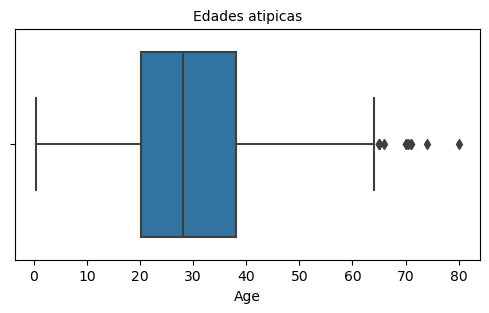

In [17]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos3['Age'])
plt.title('Edades atipicas', fontsize=10)

Text(0.5, 1.0, 'Verificación supervivencia')

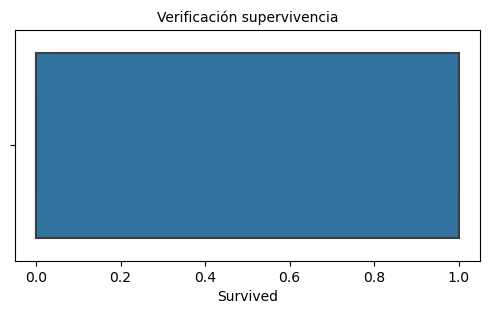

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos3['Survived'])
plt.title('Verificación supervivencia', fontsize=10)

Text(0.5, 1.0, 'Verificación rango de clases')

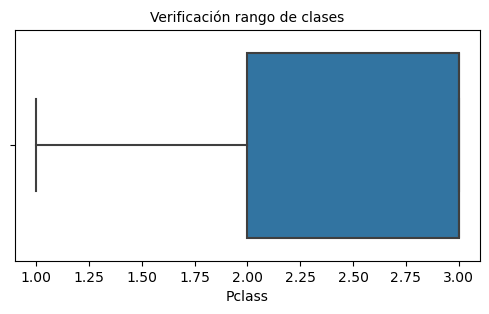

In [20]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos3['Pclass'])
plt.title('Verificación rango de clases', fontsize=10)

In [21]:
Datos3.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [22]:
print("Cantidad de registros que estan en cero en Age:",Datos3['Age'].isin([0]).sum())
print("Cantidad de registros que estan en cero en Pclass:",Datos3['Pclass'].isin([0]).sum())

Cantidad de registros que estan en cero en Age: 0
Cantidad de registros que estan en cero en Pclass: 0


In [23]:
valores_nan = Datos3.isna()
print("Valores NaN por columna:")
print(valores_nan.sum())

Valores NaN por columna:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64


In [24]:
promedio_age = Datos3['Age'].mean()

In [27]:
print ("Promedio edad es: ", promedio_age) 

Promedio edad es:  29.69911764705882


In [32]:
Datos3['Age'].fillna(promedio_age, inplace=True)

In [33]:
valores_nan = Datos3.isna()
print("Valores NaN por columna:")
print(valores_nan.sum())

Valores NaN por columna:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64


In [37]:
Datos3['Age'] = Datos3['Age'].astype(int)

In [38]:
Datos3.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22,1,0
1,2,1,1,1,38,1,0
2,3,1,3,1,26,0,0
3,4,1,1,1,35,1,0
4,5,0,3,0,35,0,0
5,6,0,3,0,29,0,0
6,7,0,1,0,54,0,0
7,8,0,3,0,2,3,1
8,9,1,3,1,27,0,2
9,10,1,2,1,14,1,0


In [40]:
Datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int32
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 45.4 KB


In [41]:
Datos3.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.544332,0.523008,0.381594
std,257.353842,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [42]:
Datos3['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [44]:
Datos3[['Survived', 'Sex']].value_counts()

Survived  Sex
0         0      468
1         1      233
          0      109
0         1       81
Name: count, dtype: int64

In [46]:
entrena = Datos3.drop('Survived', axis=1)
# se crea el archivo entrena sin la columna Survived

In [47]:
prueba = Datos3['Survived']
# se crea el archivo prueba que solo contiene la columna Survived

In [48]:
entrena_train, entrena_test, prueba_train, prueba_test = train_test_split(entrena, prueba, test_size=0.25, random_state=0)

In [49]:
entrena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   Age          891 non-null    int32
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
dtypes: int32(1), int64(5)
memory usage: 38.4 KB


In [50]:
prueba.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [57]:
m_regresion = LogisticRegression(solver = "liblinear")
m_regresion.fit(entrena_train, prueba_train)

Prediccion = m_regresion.predict(entrena_test)

In [58]:
print (prueba_test)

495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: int64


In [59]:
print (Prediccion)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]


In [60]:
print (classification_report(prueba_test, Prediccion))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       139
           1       0.73      0.69      0.71        84

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



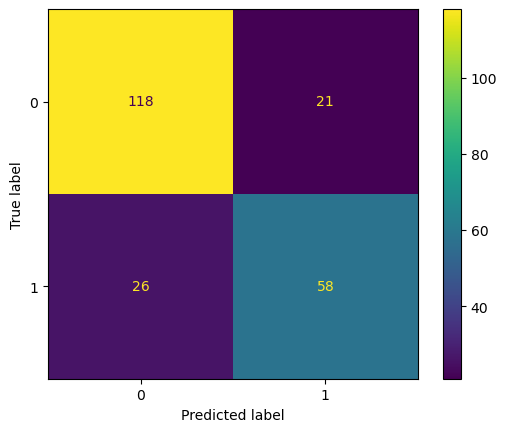

In [61]:
cm = confusion_matrix(prueba_test, Prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

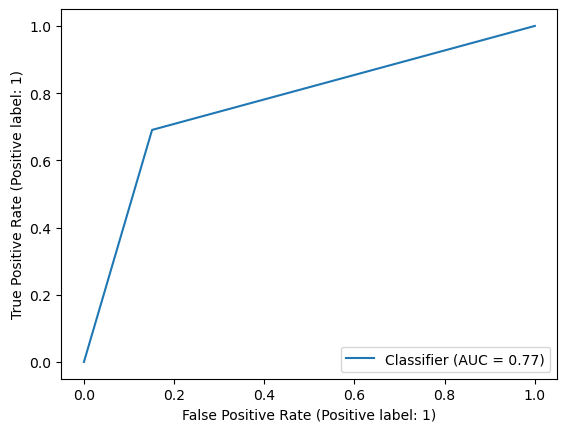

In [62]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(prueba_test, Prediccion)
plt.show()